In [6]:
# Code examples on Decision Tree Regression
# University of Passau, Chair of Sensor Technology, ACTLab research group
# Oliver Amft, 2016

%pylab inline
import pylab
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR

Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


In [7]:
data = np.loadtxt('apartment_prices.txt', dtype=np.float)
# create target vector
targets = ap_price = data[:,-1]

# create feature matrix: first and second order of apartment size
N = len(targets)
features = np.zeros((N,1))
features[:,0] = data[:,0]     # feature1: size

In [8]:
# train regression tree model
tree1 = DTR(max_depth=2)
tree1.fit(features, targets)
tree2 = DTR(max_depth=5)
tree2.fit(features, targets)

# prediction (to visualise the trained model)
testdata = np.arange(10.0, 180.0, 0.1)[:, np.newaxis]
predictions1 = tree1.predict(testdata)
predictions2 = tree2.predict(testdata)
predictions3 = tree2.predict(features)

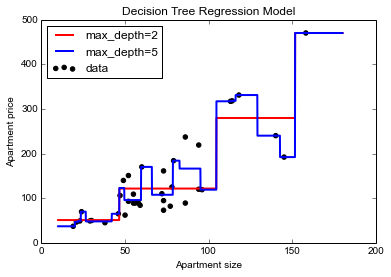

Residual sum of squares: 26276.84
Goodness of fit R²:  0.92


In [9]:
# plot dataset and prediction
plt.figure()
plt.scatter(features, targets, color='black', label="data")
plt.plot(testdata, predictions1, color="red", label="max_depth=2", linewidth=2)
plt.plot(testdata, predictions2, color="blue", label="max_depth=5", linewidth=2)
plt.title("Decision Tree Regression Model")
plt.legend(loc="upper left")
plt.xlabel('Apartment size')
plt.ylabel('Apartment price')
plt.show()

SSres = np.sum((predictions3 - targets)**2)
print "Residual sum of squares: %5.2f" % SSres
SStot = np.sum((targets - np.mean(targets))**2)
SSreg = np.sum((predictions3 - np.mean(targets))**2)
print "Goodness of fit R²: %5.2f" % (SSreg/SStot)

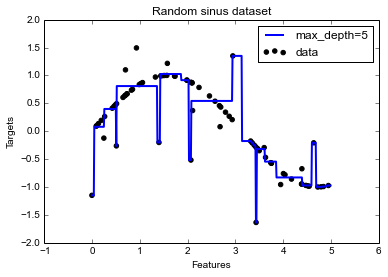

In [10]:
# Create random dataset: sin() + noise
rng = np.random.RandomState(1)
features = np.sort(5 * rng.rand(80, 1), axis=0)
targets = np.sin(features).ravel()
targets[::5] += 3 * (0.5 - rng.rand(16))

# train regression tree model
tree1 = DTR(max_depth=2)
tree1.fit(features, targets)
tree2 = DTR(max_depth=5)
tree2.fit(features, targets)

# prediction (to visualise the trained model)
testdata = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
predictions1 = tree1.predict(testdata)
predictions2 = tree2.predict(testdata)

# plot dataset and prediction
plt.figure()
plt.scatter(features, targets, color="black", label="data")
#plt.plot(testdata, predictions1, color="red", label="max_depth=2", linewidth=2)
plt.plot(testdata, predictions2, color="blue", label="max_depth=5", linewidth=2)
plt.xlabel("Features")
plt.ylabel("Targets")
plt.title("Random sinus dataset")
plt.legend()
plt.show()